In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [141]:
df = pd.read_csv("/content/abalone_data.csv")
heading_list = ['Sex_nominal','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']
df.to_csv("/content/abalone_data.csv",header=heading_list,index=False)
new_df = pd.read_csv("/content/abalone_data.csv")
new_df.head() 

,Sex_nominal,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [142]:
new_df.shape

(4176, 9)

In [143]:
new_df['Sex_nominal'].unique()

array(['M', 'F', 'I'], dtype=object)

In [144]:
new_df['Sex_nominal'] = new_df['Sex_nominal'].apply({'M':0,'F':1,'I':2}.get)

In [145]:
new_df.head()

,Sex_nominal,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [146]:
new_df.columns

Index(['Sex_nominal', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [147]:
new_df.dtypes

Sex_nominal         int64
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [148]:
new_df.isnull().sum()

Sex_nominal       0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [149]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex_nominal     4176 non-null   int64  
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole_weight    4176 non-null   float64
 5   Shucked_weight  4176 non-null   float64
 6   Viscera_weight  4176 non-null   float64
 7   Shell_weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [150]:
new_df.describe()

,Sex_nominal,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.955699,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.827782,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [151]:
new_df.corr()

,Sex_nominal,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Sex_nominal,1.000000,-0.449014,-0.458448,-0.418346,-0.461512,-0.441185,-0.454960,-0.445818,-0.351547
Length,-0.449014,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
Diameter,-0.458448,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
Height,-0.418346,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
Whole_weight,-0.461512,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
Shucked_weight,-0.441185,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
Viscera_weight,-0.454960,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
Shell_weight,-0.445818,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
Rings,-0.351547,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


In [152]:
new_df.corr()['Rings']

Sex_nominal      -0.351547
Length            0.557123
Diameter          0.575005
Height            0.558109
Whole_weight      0.540818
Shucked_weight    0.421256
Viscera_weight    0.504274
Shell_weight      0.628031
Rings             1.000000
Name: Rings, dtype: float64

In [153]:
df_1=new_df.copy()

In [154]:
Age = []
for i in df_1['Rings']:
    if int(i) > 11.12:
        Age.append('1')
    else:
        Age.append('0')
df_1['Age'] = Age
df_1.drop('Rings', axis = 1, inplace = True)

df_1.head()

,Sex_nominal,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0
3,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,0


In [155]:
df_1.drop('Sex_nominal', axis=1,inplace=True)
df_1

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,0
...,...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0


## Data Visualization

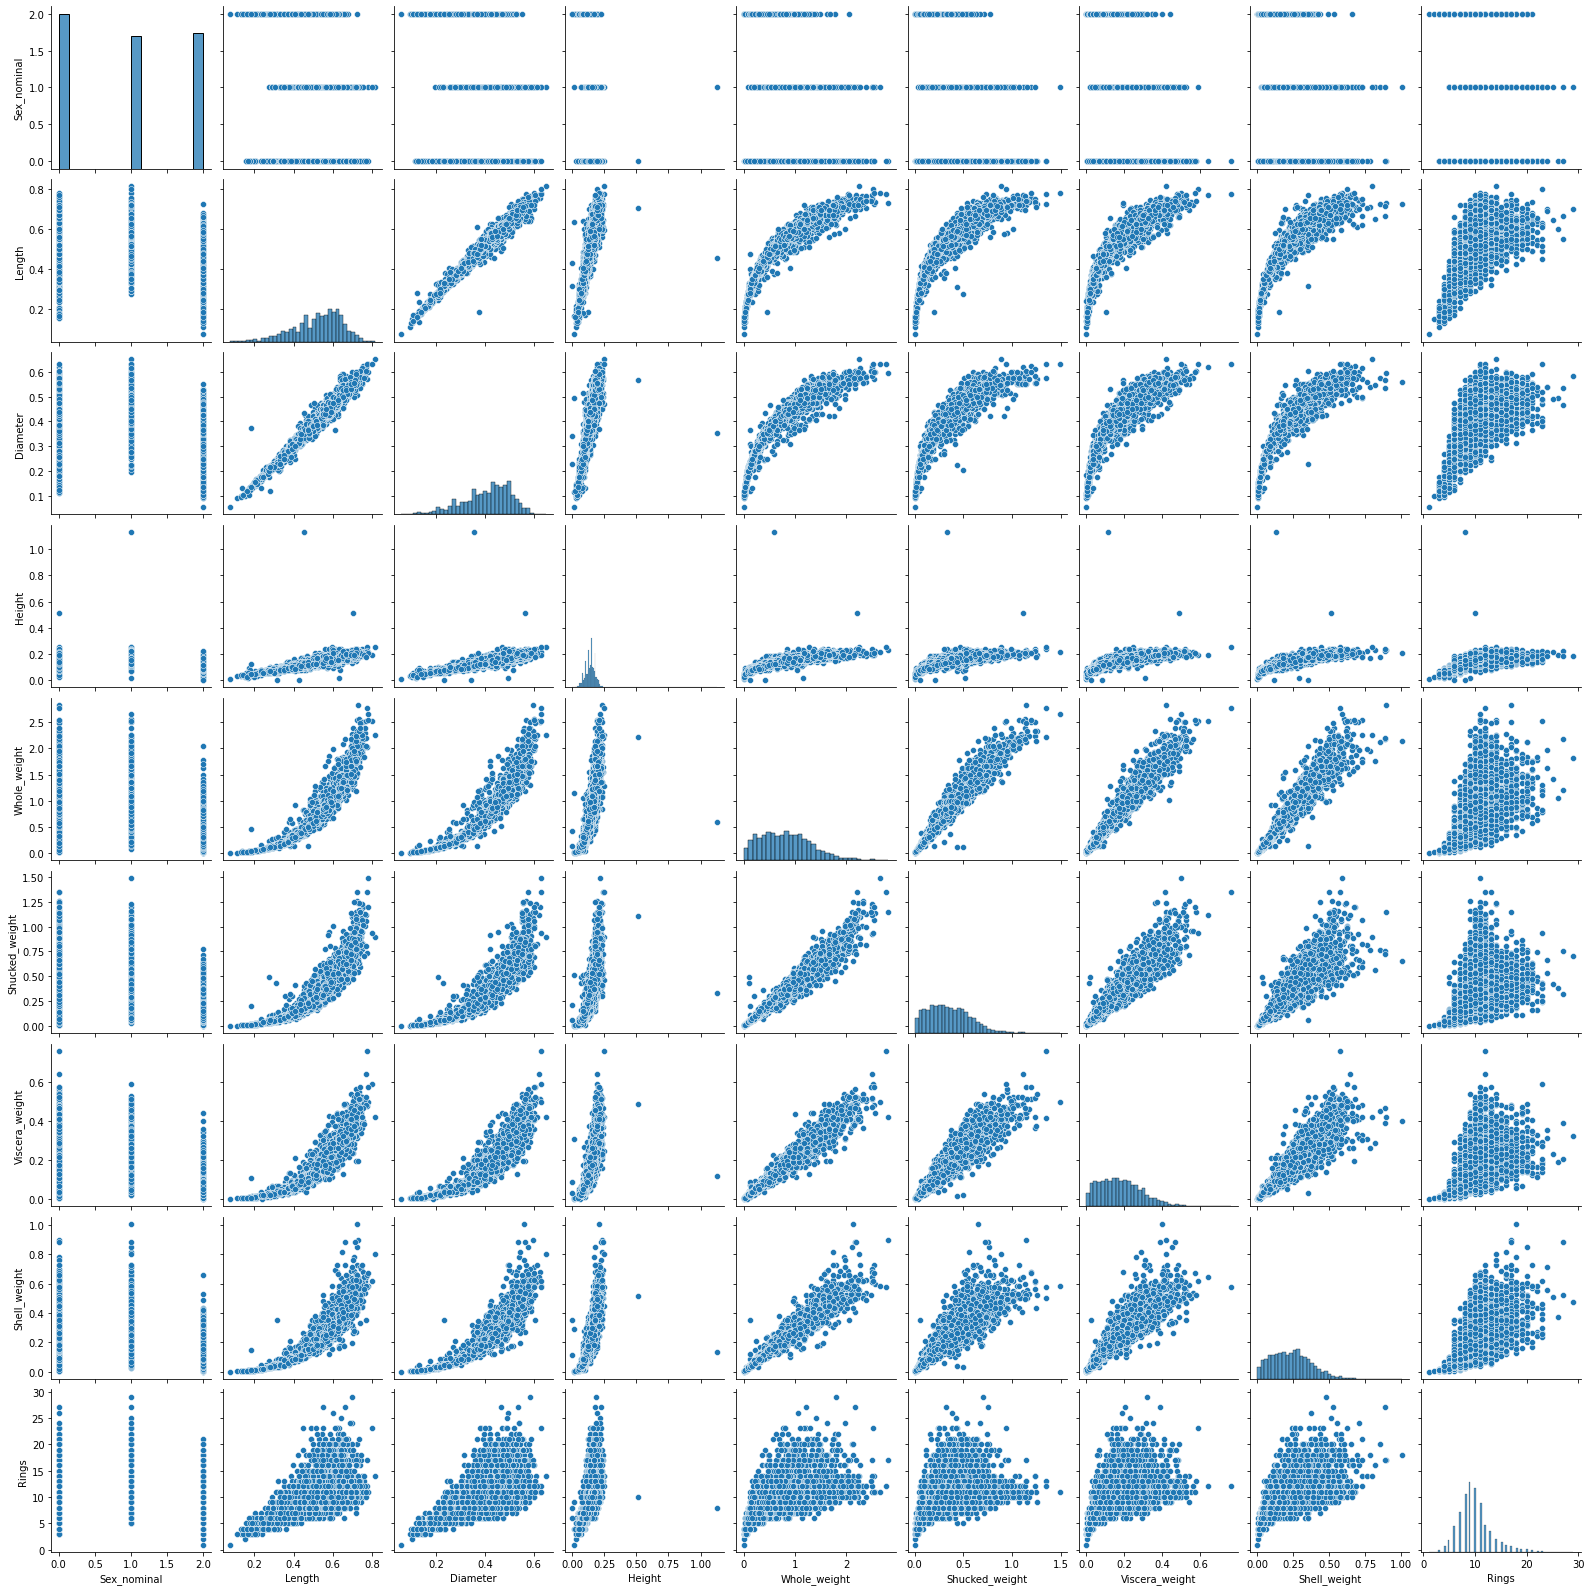

In [156]:
sns.pairplot(new_df)

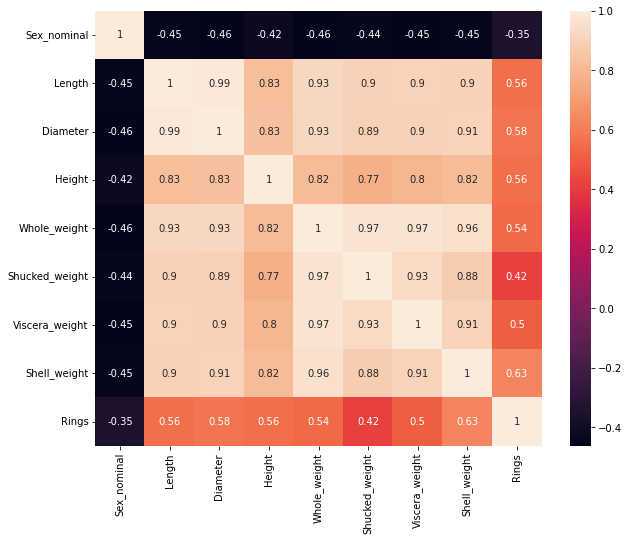

In [157]:
fig_dim=(10,8)
fig, ax = plt.subplots(figsize=fig_dim)
sns.heatmap(new_df.corr(),annot=True,ax=ax)

In [158]:
new_df.drop(new_df[(new_df['Length']<0.1) & (new_df['Rings'] < 5)].index, inplace=True)
new_df.drop(new_df[(new_df['Length']<0.8) & (new_df['Rings'] > 25)].index, inplace=True)
new_df.drop(new_df[(new_df['Length']>=0.8) & (new_df['Rings']< 25)].index, inplace=True)

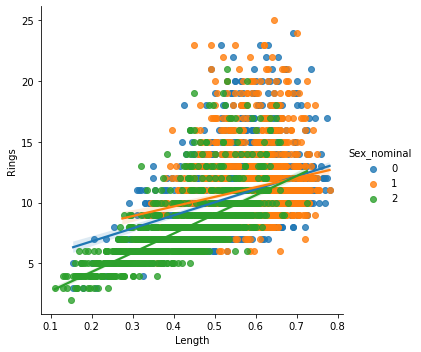

In [159]:
sns.lmplot(x='Length',y='Rings',data=new_df,hue='Sex_nominal')

In [160]:
new_df.drop(new_df[(new_df['Diameter']<0.1) & (new_df['Rings'] < 5)].index, inplace=True)
new_df.drop(new_df[(new_df['Diameter']<0.6) & (new_df['Rings'] > 25)].index, inplace=True)
new_df.drop(new_df[(new_df['Diameter']>=0.6) & (new_df['Rings']< 25)].index, inplace=True)

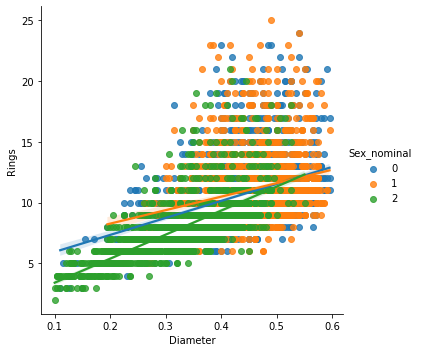

In [161]:
sns.lmplot(x='Diameter',y='Rings',data=new_df,hue='Sex_nominal')

In [162]:
new_df.drop(new_df[(new_df['Height']>0.4) & (new_df['Rings'] < 15)].index, inplace=True)
new_df.drop(new_df[(new_df['Height']<0.4) & (new_df['Rings'] > 25)].index, inplace=True)

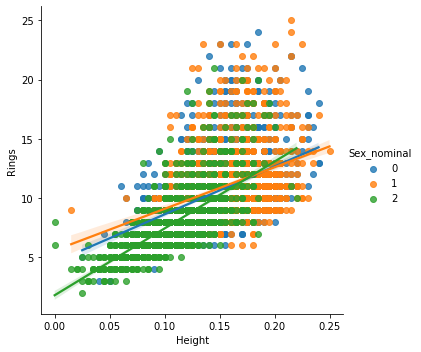

In [163]:
sns.lmplot(x='Height',y='Rings',data=new_df,hue='Sex_nominal')

In [164]:
new_df.drop(new_df[(new_df['Whole_weight']>= 2.5) & (new_df['Rings'] < 25)].index, inplace=True)
new_df.drop(new_df[(new_df['Whole_weight']<2.5) & (new_df['Rings'] > 25)].index, inplace=True)

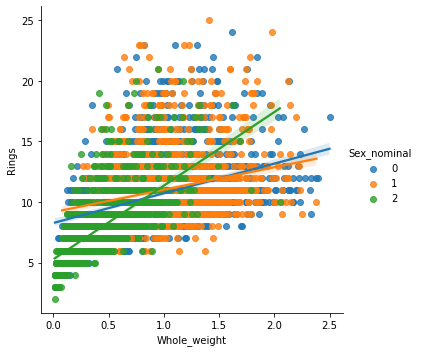

In [165]:
sns.lmplot(x='Whole_weight',y='Rings',data=new_df,hue='Sex_nominal')

In [166]:
new_df.drop(new_df[(new_df['Shucked_weight']>= 1) & (new_df['Rings'] < 20)].index, inplace=True)
new_df.drop(new_df[(new_df['Shucked_weight']<1) & (new_df['Rings'] > 20)].index, inplace=True)

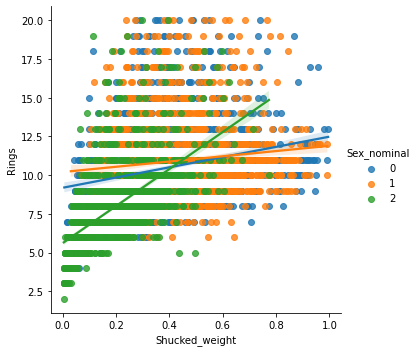

In [167]:
sns.lmplot(x='Shucked_weight',y='Rings',data=new_df,hue='Sex_nominal')

In [168]:
new_df.drop(new_df[(new_df['Viscera_weight']> 0.5) & (new_df['Rings'] < 20)].index, inplace=True)
new_df.drop(new_df[(new_df['Viscera_weight']<0.5) & (new_df['Rings'] > 25)].index, inplace=True)

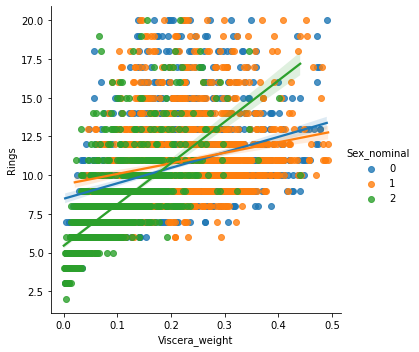

In [169]:
sns.lmplot(x='Viscera_weight',y='Rings',data=new_df,hue='Sex_nominal')

In [170]:
new_df.drop(new_df[(new_df['Shell_weight']> 0.6) & (new_df['Rings'] < 25)].index, inplace=True)
new_df.drop(new_df[(new_df['Shell_weight']<0.8) & (new_df['Rings'] > 25)].index, inplace=True)

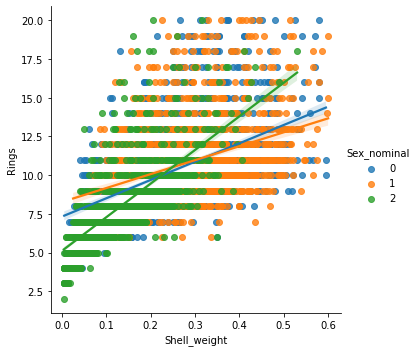

In [171]:
sns.lmplot(x='Shell_weight',y='Rings',data=new_df,hue='Sex_nominal')

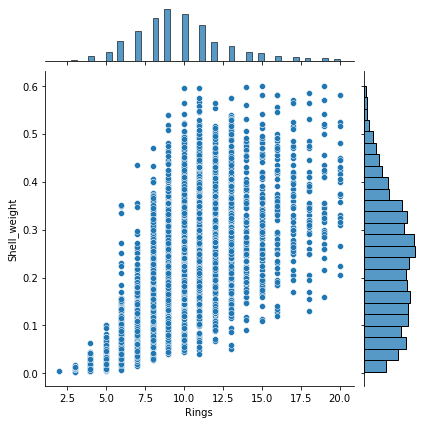

In [172]:
sns.jointplot(x=new_df["Rings"], y=new_df["Shell_weight"],kind='scatter')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


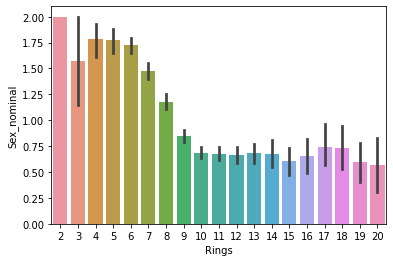

In [173]:
sns.barplot('Rings','Sex_nominal',data=new_df)

## Model Training

In [174]:
X = df_1.drop('Age',axis=1)
y = df_1['Age']

In [175]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [176]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [177]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,f1_score

mean_squared_error(y_test,y_pred)



0.11848529735356529